# Gradient Descent and its Variants

**Performing gradient descent in regression** <br>
The equation of a simple linear regression can be expressed as follows: <br>
$$y_{hat} = mx + b$$

In [11]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
#Preparing the Dataset
data = np.random.randn(500,2) #generate random data points with 500 rows and 2 column (x and y)

In [22]:
print(data[0]) #first column indicates x value and second column represents y value

[-0.05371103  0.01748245]


Since, there are two parameters *m* and **b**, we store these parametersin an array called *theta*.

In [14]:
theta = np.zeros(2) #At first, we initialize the value of theta with zeros

theta[0] is *m* and theta[1] is b.

In [15]:
print(theta)

[0. 0.]


**Defining the loss function**

In [26]:
def loss_function(data,theta):
  m = theta[0]
  b = theta[1]

  loss = 0
  for i in range(0, len(data)):
    x = data[i,0]
    y = data[i,1]
    y_hat = (m*x + b)

    loss = loss + ((y - (y_hat)) ** 2)
  mse = loss / float(len(data))
  return mse

In [27]:
loss_function(data,theta) #we need to minimize this loss

0.9529319622910829

# Computing the gradients of the loss function

In [28]:
def compute_gradients(data,theta):
  gradients = np.zeros(2)
  N = float(len(data))
  m = theta[0]
  b = theta[1]
  for i in range(0,len(data)):
    x = data[i,0]
    y = data[i,1]
    gradients[0] += - (2 / N) * x * (y - (( m* x) + b)) #gradient of the loss with respect to m
    gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b)) #gradient of the loss with respect to b

  epsilon = 1e-6 #to avoid division by zero error
  gradients = np.divide(gradients, N + epsilon)

  return gradients

In [29]:
compute_gradients(data,theta)

array([0.00028265, 0.00025373])

# Updating the model parameters

Text(0.5, 1.0, 'Gradient Descent')

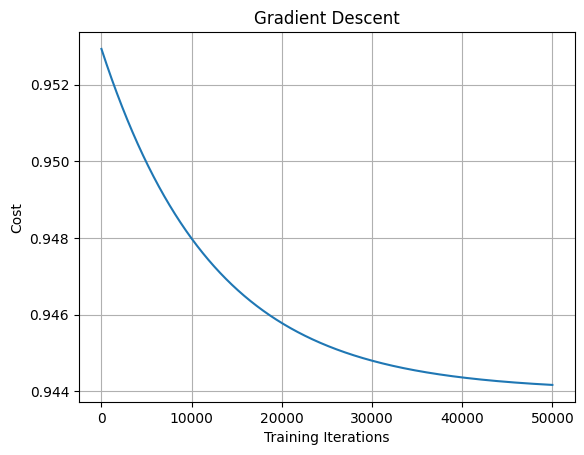

In [30]:
num_iterations = 50000
lr = 1e-2
loss = []

for t in range(num_iterations):
  gradients = compute_gradients(data,theta)

  theta = theta - (lr * gradients)

  #store the loss
  loss.append(loss_function(data,theta))

plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

In [31]:
#Minibatch gradient descent
def minibatch(data,theta,lr=1e-2,minibatch_ratio=0.01,num_iterations=1000):
  minibatch_size = int(math.ceil(len(data) * minibatch_ratio))

  for t in range(num_iterations):
    sample_size = random.sample(range(len(data)), minibatch_size)
    np.random.shuffle(data)
    sample_data = data[0:sample_size[0],:]
    grad = compute_gradients(sample_data, theta)
    theta = theta - (lr * grad)
  return theta

minibatch(data,theta)


array([-0.02147169, -0.02386217])

# Momentum based gradient descent

In [32]:
def momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
  vt = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    vt = gamma * vt + lr * gradients
    theta = theta - vt
  return theta
momentum(data, theta)

array([-0.06466263, -0.0581522 ])

# Nesterov accelerated gradient

In [33]:
def NAG(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
  vt = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta - gamma * vt)
    vt = gamma * vt + lr * gradients
    theta = theta - vt
  return theta

NAG(data, theta)

array([-0.06466172, -0.05815139])

# AdaGrad(Adaptive Gradient Descent )

In [34]:
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 10000):
  gradients_sum = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    gradients_sum += gradients ** 2
    gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))
    theta = theta - (lr * gradient_update)
  return theta
AdaGrad(data, theta)

array([-0.07098648, -0.06357815])

In [35]:
def AdaDelta(data, theta, gamma = 0.9, epsilon = 1e-5, num_iterations = 1000):
  E_grad2 = np.zeros(theta.shape[0])
  E_delta_theta2 = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
    delta_theta = - (np.sqrt(E_delta_theta2 + epsilon)) / (np.sqrt(E_grad2 +epsilon)) * gradients
    E_delta_theta2 = (gamma * E_delta_theta2) + ((1. - gamma) * (delta_theta **2))
    theta = theta + delta_theta
  return theta

AdaDelta(data, theta)

array([-0.07081787, -0.06344104])

In [36]:
def RMSProp(data, theta, lr = 1e-2, gamma = 0.9, epsilon = 1e-6, num_iterations =1000):
  E_grad2 = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
    theta = theta - (lr / (np.sqrt(E_grad2 + epsilon)) * gradients)
  return theta

RMSProp(data, theta)

array([-0.07098648, -0.06357815])

# ADAM optimizer(Adaptive moment Estimation )

In [37]:
def Adam(data, theta, lr=1e-2, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=1000):
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1.0 - beta1) * gradients
        vt = beta2 * vt + (1.0 - beta2) * (gradients ** 2)
        mt_hat = mt / (1.0 - beta1 ** (t + 1))
        vt_hat = vt / (1.0 - beta2 ** (t + 1))
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
    return theta
Adam(data, theta)

array([-0.07098648, -0.06357815])

In [38]:
# Adamax - Adam based on infinity norm
def Adamax(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 1000):
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1. - beta1) * gradients
        vt = np.maximum(beta2 * vt, np.abs(gradients))
        mt_hat = mt / (1. - beta1 ** (t+1))
        theta = theta - ((lr / (vt + epsilon)) * mt_hat)
    return theta

Adamax(data, theta)

array([-0.07098648, -0.06357815])

In [39]:
# Adaptive moment estimation with AMSGrad
def AMSGrad(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    vt_hat = np.zeros(theta.shape[0])
    for t in range(num_iterations):
        mt = beta1 * mt + (1. - beta1) * gradients
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        vt_hat = np.maximum(vt_hat,vt)
        mt_hat = mt / (1. - beta1 ** (t+1))
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
    return theta

AMSGrad(data, theta)

array([-9.88913054, -9.84635718])

In [41]:
# Nadam - adding NAG to ADAM
def nadam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 500):
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    beta_prod = 1
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1. - beta1) * gradients
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        beta_prod = beta_prod * (beta1)
        mt_hat = mt / (1. - beta_prod)
        g_hat = gradients / (1. - beta_prod)
        vt_hat = vt / (1. - beta2 ** (t))
        mt_tilde = (1-beta1**t+1) * mt_hat + ((beta1**t)* g_hat)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
    return theta

nadam(data, theta)

<ipython-input-41-9e55de9e823b>:13: RuntimeWarning: divide by zero encountered in divide
  vt_hat = vt / (1. - beta2 ** (t))


array([-0.07098648, -0.06357815])